Objective : 
The objective of this project is to perform train and fit multiple unsupervised learning models   in a data set of mushrooms classification to poison and not poisonous t and then compare the result of the generated clusters to the actual classification and then doing a pca and getting the factors that represent 90% of the variance


In [17]:
import skillsnetwork
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats
import os
import numpy as np
import pandas as pd
import skillsnetwork
from scipy.stats import boxcox
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import keras 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

path='data/mushrooms.csv'
data=pd.read_csv(path ,)
data1=pd.read_csv(path ,)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Data set : 
The dataset was downloaded from Kaggle and contain data about different mushrooms and has 23 columns that describe the different characteristics of them. all columns data type is object .and the dataset  contain 8124 entries  
Classification of mushrooms: 
Attribute Information: (classes: edible=e, poisonous=p) cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y bruises: bruises=t,no=f odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s gill-attachment: attached=a,descending=d,free=f,notched=n gill-spacing: close=c,crowded=w,distant=d gill-size: broad=b,narrow=n gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y stalk-shape: enlarging=e,tapering=t stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? 
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y veil-type: partial=p,universal=u veil-color: brown=n,orange=o,white=w,yellow=y ring-number: none=n,one=o,two=t ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d plan : 
after the data is run through eda and cleaning it will be tried in different clustering models then compare there results and to the original classification then the optimal number of clusters will be found  
after that pca will be applied to the data representing 90% of the variance  and then the feature coefficients will   extracted  


In [36]:
#data=data.drop(labels='class', axis=1)
data2=pd.read_csv(path ,)

In [2]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
t=data.groupby(col).count()
t.reset_index(inplace=True)
t

NameError: name 'col' is not defined

Data exploration ,cleaning, and feature engneering: 
first the data was checked for null and duplicate values and dealt and none were found . then the amount of entries of each classes was bar plotted . 
    
 Then the features disruption of poisonous vs edible was plotted 
  
After that all the columns were run through one-hot-encoders and Label Encoded both of these new datasets were set for fitting  


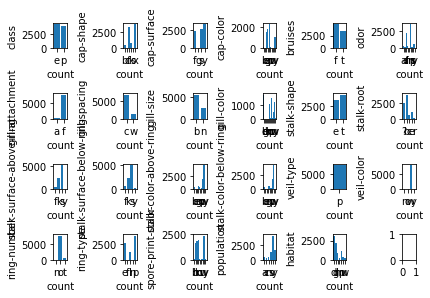

In [5]:
fig, ax = plt.subplots(4, 6, sharex=False, sharey=False)
i=0
j=0
for col in data.columns:
  

  t=data.groupby(col).count()
  t.reset_index(inplace=True)
  if col=='population':
     ax[i][j].bar(t[col],t['odor'])
     ax[i][j].set(xlabel='count',   ylabel=col)
     j=j+1
     if j==6:
           i=i+1
           j=0

     continue
  ax[i][j].bar(t[col],t['population'])
  ax[i][j].set(xlabel='count',   ylabel=col)
  j=j+1
  if j==6:
    i=i+1
    j=0
fig.tight_layout(pad=1.0)

In [6]:
for col in data.columns:
 mask = data[col].map(data[col].value_counts()) < 100
 data[col] = data[col].mask(mask, 'other')


In [7]:
(data['cap-shape'].value_counts() < 10).index

Index(['x', 'f', 'k', 'b', 'other'], dtype='object')

In [8]:
t=data.groupby(['class',col]).count()
t.reset_index(inplace=True)

t[t['class']=='e']
ind = np.arange(23)
ind    
t[t['class']=='e']['population']

0    1880
1    1408
2     240
3     256
4     136
5      96
6     192
Name: population, dtype: int64

c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.


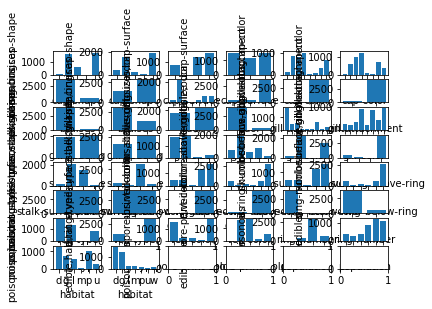

In [9]:
colm=data.columns[1:]
fig, ax = plt.subplots(8, 6, sharex=False, sharey=False)
i=0
j=0
for col in colm:
  t=[]

  t=data.groupby(['class',col]).count()
  t.reset_index(inplace=True)
  ind = np.arange(23)
  if col=='population':
     ax[i,j].bar(t[t['class']=='p'][col],t[t['class']=='p']['odor'])
     ax[i,j].set  (xlabel=col,ylabel='poisonous')
     ax[i,j+1].bar(t[t['class']=='e'][col],t[t['class']=='e']['odor'],)
     ax[i,j+1].set( xlabel=col,ylabel='edible')
     j=j+2
     if j==6:
        i=i+1
        j=0
     continue

  ax[i,j].bar(t[t['class']=='p'][col],t[t['class']=='p']['population'])
  ax[i,j].set  (xlabel=col,ylabel='poisonous,'+col)
  ax[i,j+1].bar(t[t['class']=='e'][col],t[t['class']=='e']['population'],)
  ax[i,j+1].set(xlabel=col, ylabel='edible,'+col)
  
  j=j+2
  if j==6:
        i=i+1
        j=0
fig.tight_layout(pad=1.0)

In [10]:
x=data['cap-shape'].unique()
x

array(['x', 'b', 'other', 'f', 'k'], dtype=object)

In [11]:
x=[]
for c1 in data.columns:
 for c2 in data.columns:
  t=data.groupby([c1, c2]).count()
  t.reset_index(inplace=True)  
  print(t)


ValueError: cannot insert class, already exists

In [12]:
plt.bar(t[f][(t['cap-shape']=='b')],t['habitat'][(t['cap-shape']=='b')],  label='f')

NameError: name 'f' is not defined

In [19]:
data1=data

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohc = OneHotEncoder( drop='first',)
le = LabelEncoder()


for col in data.columns:
    
    # Integer encode the string categories
    dat = le.fit_transform(data[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data = data.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data = pd.concat([data, new_df], axis=1)
data

c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == "__main__":
c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == "__main__":
c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,cap-color_1,...,population_1,population_2,population_3,population_4,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohc = LabelEncoder( )
le = LabelEncoder()


for col in data1.columns:
    
    # Integer encode the string categories
    dat = le.fit_transform(data1[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data1 = data1.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = 1
    col_names = ['_'.join([col,]) ]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat, 
                          index=data1.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data1 = pd.concat([data1, new_df], axis=1)
data1

c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == "__main__":
c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [22]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

 First clustering models: 
1-	K means : the model was fitted for finding 1 to 20 clusters and the clusters to inertia plot was plotted to find the optimal number of clusters : the model was trained using 2 different algorithms ‘lloyd’ and ‘elkan’: 


In [ ]:
km = KMeans(n_clusters=2,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(data)

In [76]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters,)
    km.fit(data1)
    inertia.append(km.inertia_)

In [107]:
col=data1.columns

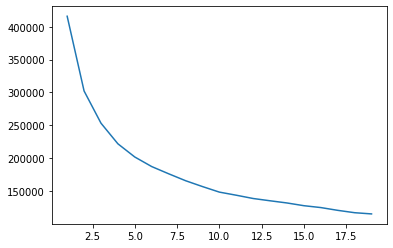

In [91]:
plt.plot(list_num_clusters,inertia)

In [92]:
inertia

[415858.04923682904,
 302164.5577844615,
 253168.31494792138,
 221793.7210317346,
 201708.4134948022,
 187160.8914964799,
 176217.27279356026,
 165680.0594583659,
 156752.86519382312,
 148314.23856059584,
 143583.79534988827,
 138580.51346520754,
 135116.26756416378,
 131792.03726300626,
 127640.41529654973,
 124798.5372536441,
 120574.71807631459,
 116974.93014041743,
 115134.72652161171]

In [93]:
km = KMeans(n_clusters=2,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(data[col])

KMeans(n_clusters=2, n_init=1, random_state=10)

In [94]:
data['kmean']=km.predict(data[col])

In [33]:
data.kmean

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: kmean, Length: 8124, dtype: int32

In [95]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
data2['class'] = labelencoder.fit_transform(data2['class'])

In [96]:
r2_score(data2['class'], data['kmean'])

0.5977077564209617

2-	Agglomerative Clustering Dendrogram: the model was trained using ward and complete linkage for both ohc and label encoding : 

In [100]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[col])
data['agglom'] = ag.fit_predict(data[col])

In [102]:
data['agglom']=np.where((data['agglom']==0)|(data['agglom']==1), data['agglom']^1, data['agglom'])
r2_score(data2['class'], data['agglom'])

0.5602393611856592

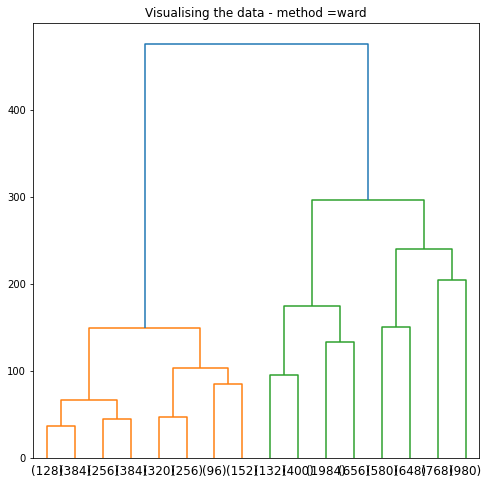

In [108]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data - method =ward')

Dendrogram = shc.dendrogram(shc.linkage(data1[col],method ='ward',),truncate_mode='level',p=3)


In [83]:
 data = pd.concat([data, data2['class']], axis=1)

In [103]:
(data[['class','agglom','kmean']]
 .groupby(['class','agglom'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
class agglom        
0     0         4208
1     0          892
      1         3024

In [104]:
(data[['class','agglom','kmean']]
 .groupby(['class','kmean'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
class kmean        
0     0        4208
1     0         816
      1        3100

In [105]:
(data[['class','agglom','kmean']]
 .groupby(['class','agglom','kmean'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
class agglom kmean        
0     0      0        4208
1     0      0         816
             1          76
      1      1        3024

 dbscan: 
Db scan was trained to with a grid search to find a good number of clusters : 
By setting epsilon=(1,2,3,4,5,6,7)and minimum points in(10,20,30,40,50,60,70) 
It either found so many small clusters or one big cluster and few small ones the most reasonable results   
The most reasonable ones are were eps = 4,5 and min samples examples  


In [124]:
from sklearn.cluster import DBSCAN
res=list()
for eps in[4,5]:
    for samples in [10,20,30,40,50]:
      db=DBSCAN(eps=eps,min_samples=samples)
      db=db.fit(data1[col])
      data1['db'] = db.fit_predict(data1[col])
      print(eps,samples,data1['db'].value_counts())
                         
res

4 10  0     5256
 3     1152
 1      768
 5      576
 6       62
 4       48
 14      36
-1       34
 11      24
 7       24
 10      24
 2       24
 13      24
 9       24
 12      24
 8       24
Name: db, dtype: int64
4 20  0     5248
 2     1152
 1      768
 3      576
 4       56
-1       48
 5       48
 14      36
 11      24
 7       24
 10      24
 6       24
 13      24
 9       24
 12      24
 8       24
Name: db, dtype: int64
4 30  0    5118
 2    1152
 1     768
 3     576
-1     386
 5      48
 4      40
 6      36
Name: db, dtype: int64
4 40  0    4917
 2    1152
 1     768
-1     663
 3     576
 4      48
Name: db, dtype: int64
4 50  0    4754
 2    1152
-1     778
 1     768
 3     576
 5      48
 4      48
Name: db, dtype: int64
5 10 0    6168
1    1824
2      96
3      36
Name: db, dtype: int64
5 20  0    6167
 1    1824
 2      96
 3      36
-1       1
Name: db, dtype: int64
5 30  0    6102
 1    1788
-1     135
 2      63
 3      36
Name: db, dtype: int64
5 40  0    

[]

In [112]:
data1['db'] = db.fit_predict(data1[col])

In [114]:
data1['db'].value_counts()

-1    3435
 4    1739
 5    1152
 6     576
 2     512
 0     386
 1     196
 3     128
Name: db, dtype: int64

In [ ]:
data['class'].value_counts()

In [ ]:
data['db'][data['db'] != 0] = 1

In [ ]:
r2_score(data1['class'], data['db'])

In [ ]:
data['db']=np.where((data['db']==0)|(data['db']==1), data['db']^1, data['db'])

4-PCA: 
Pca was used on both the one hot encoded and the label encoded data 
 


In [125]:
from sklearn.decomposition import PCA

PCAa = PCA(n_components=7)
PCAa.fit(data)

PCA(n_components=7)

In [126]:
PCAa.explained_variance_ratio_.sum()

0.5789626399135496

In [156]:
ca_list = list()
feature_weight_list = list()
pca_list=list()

# Fit a range of PCA models

for n in range(1, 10):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data1)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data1.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df


,model,var
n,,
1,PCA(n_components=1),0.33858
2,PCA(n_components=2),0.503707
3,PCA(n_components=3),0.626031
4,PCA(n_components=4),0.6937
5,PCA(n_components=5),0.751777
6,PCA(n_components=6),0.802545
7,PCA(n_components=7),0.849155
8,PCA(n_components=8),0.88807
9,PCA(n_components=9),0.923699


In [161]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

feature_weight_list

[    n                  features    values
 0   1                 cap-shape  0.001908
 1   1               cap-surface  0.023750
 2   1                 cap-color  0.071861
 3   1                   bruises  0.023259
 4   1                      odor  0.076623
 5   1           gill-attachment  0.001263
 6   1              gill-spacing  0.001104
 7   1                 gill-size  0.027058
 8   1                gill-color  0.282873
 9   1               stalk-shape  0.014861
 10  1                stalk-root  0.042106
 11  1  stalk-surface-above-ring  0.008569
 12  1  stalk-surface-below-ring  0.011025
 13  1    stalk-color-above-ring  0.031867
 14  1    stalk-color-below-ring  0.032515
 15  1                 veil-type  0.000000
 16  1                veil-color  0.001565
 17  1               ring-number  0.000978
 18  1                 ring-type  0.120085
 19  1         spore-print-color  0.152017
 20  1                population  0.004823
 21  1                   habitat  0.038113
 22  1     

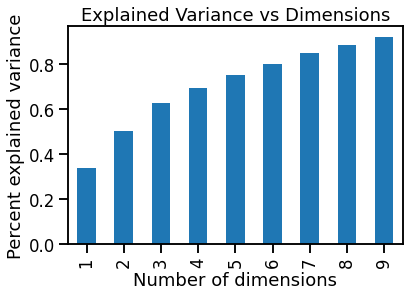

In [158]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

(8124, 98)

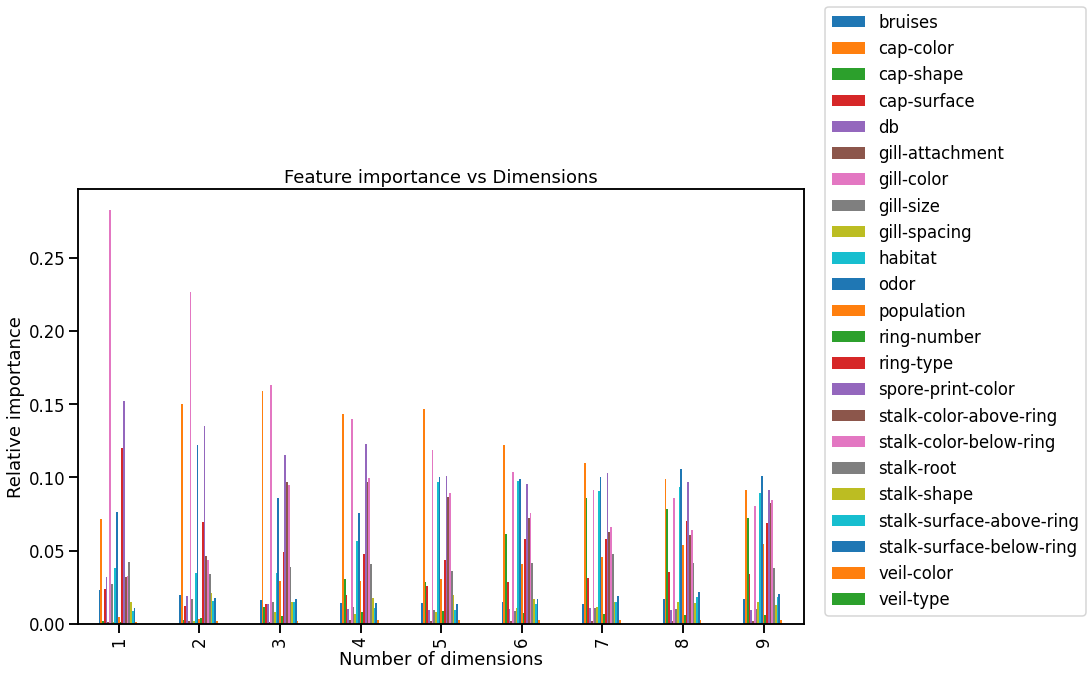

In [159]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='lower right',bbox_to_anchor=(1.4,-0.))
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');
data.shape

In [160]:
features_df

features,bruises,cap-color,cap-shape,cap-surface,db,gill-attachment,gill-color,gill-size,gill-spacing,habitat,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,veil-type
n,,,,,,,,,,,,,,,,,,,,,
1,0.023259,0.071861,0.001908,0.023750,0.031778,0.001263,0.282873,0.027058,0.001104,0.038113,...,0.120085,0.152017,0.031867,0.032515,0.042106,0.014861,0.008569,0.011025,0.001565,0.000000e+00
2,0.019724,0.150273,0.002453,0.012222,0.018828,0.001732,0.226547,0.016816,0.001785,0.034810,...,0.069574,0.134851,0.046191,0.043894,0.033793,0.021092,0.015832,0.017699,0.002133,0.000000e+00
3,0.015916,0.158983,0.011784,0.013754,0.013247,0.001547,0.163068,0.015112,0.007914,0.034942,...,0.049181,0.115040,0.096583,0.095033,0.038569,0.014947,0.015165,0.016971,0.001875,0.000000e+00
4,0.013867,0.143411,0.030428,0.019777,0.009776,0.002488,0.139544,0.011182,0.006834,0.056630,...,0.047627,0.122563,0.096527,0.099470,0.040843,0.017813,0.011125,0.014199,0.002857,0.000000e+00
5,0.014051,0.146640,0.028440,0.025640,0.009472,0.002231,0.118616,0.009516,0.008357,0.096691,...,0.043591,0.101195,0.086782,0.089152,0.035734,0.019535,0.009515,0.013481,0.002666,0.000000e+00
6,0.014979,0.122236,0.061299,0.028838,0.009915,0.002095,0.103555,0.008931,0.010676,0.097588,...,0.057678,0.095369,0.072504,0.075823,0.041769,0.016602,0.013341,0.017047,0.002607,0.000000e+00
7,0.013571,0.109542,0.086233,0.031404,0.010834,0.001889,0.091620,0.010923,0.011174,0.090725,...,0.057805,0.103235,0.062369,0.066067,0.047557,0.015218,0.015054,0.019251,0.002481,0.000000e+00
8,0.016912,0.098727,0.078501,0.035379,0.009605,0.001740,0.085673,0.010267,0.014704,0.093516,...,0.070187,0.096602,0.060680,0.064295,0.041271,0.013984,0.018546,0.021383,0.002564,1.396006e-24
9,0.016639,0.091326,0.071974,0.034149,0.009365,0.001656,0.080579,0.009915,0.014622,0.089169,...,0.068743,0.091689,0.082549,0.084472,0.038084,0.013071,0.017984,0.020385,0.002354,4.089046e-24


In [136]:
data.shape

(8124, 98)

In [ ]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters,)
    km.fit(data1)
    inertia.append(km.inertia_)

In [154]:
PCAmod = PCA(n_components=29)
PCAmod.fit(data)
pcam=PCAmod.transform(data)

Then a k means cluster was trained on the pca transformed data set  
Inertia vs cluster for 9 components from the label data set  


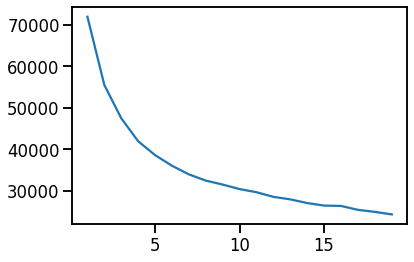

In [155]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters,)
    km.fit(pcam)
    inertia.append(km.inertia_)
plt.plot(list_num_clusters,inertia)

Conclusion: 
For the sake of clustering k means and Agglomerative Clustering had similar cluster sizes with close enough performance and since the dataset is small both of them can be used without worrying about computation overhead.  
For the pca the label encoded version explained the a similar percent of the variance with smaller number of parameters compared to the ohc one. Also using smaller number if parameters is easier to explain visually so it is the one that will end up being selected  
Key findings 
the ideal number of clusters for the k means was found to be around 7 to 10 clusters using the elbow of the inertia cluster graph . and the Agglomerative Clustering tree graph suggests around 4 to 10 clusters  
the db scan only found one large cluster and a lot of small clusters with a big eps or a lot of small clusters with a lot of noise with a small eps  
the pca was able to explain above 90% of the variance using 9 components in the label encoded data and 29 in the ohc data . 
looking at the  feature importance graph  gill color ring- type and spore print color had the most contributions  
next steps: 
more data cleaning can be done like dropping the classes with very few readings or the columns with little impact 
the data can still be further analyzed using other algorithms or using different metrics . the pca reduced dataset can also be run through dbscan and Agglomerative Clustering 
 
 
